### Student Information
Name: Assefa Chekole

Student ID: 110162865

GitHub ID: 80949774

---

### Instructions

1. First: do the **take home** exercises in Part 1 of the [SNHC7450-Lab2-master Repo](https://github.com/fhcalderon87/SNHC7450_Lab2_master/blob/main/SNHC4750_Lab2_master.ipynb). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [SNHC7450-Lab2-master Repo](https://github.com/fhcalderon87/SNHC7450_Lab2_master/blob/main/SNHC4750_Lab2_master.ipynb) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 40% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and/or textbooks for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generat a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


Create a new repository on Github and upload your homework to it. Submit a link to the repository to my email __BEFORE the deadline (Dec. 27th 11:59 pm, Monday)__. 

In [1]:
### Begin Assignment Here

# take home exercises in Part 1

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [5]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [6]:
len(twenty_train.data)

2257

In [7]:
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

** >>> Exercise 1 >>> **

In [8]:
# to query every 10th record and displaying  the first 5 records

X.iloc[::10][0:5]

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...
40,From: david-s@hsr.no (David A. Sjoen) Subject:...


### >>> **Exercise 2 (take home)** 

In my observation from the data and the process, Values A, and B are a float that have been represented by np.nan. on C and D both of them  are strings and tried to convert them in to a float using 'NAN' and 'None'. 
here we need to Keep in mind that NaN and None is specifically a floating-point value.So, there is no equivalent NaN and None value for strings and float and other types. on the other hand as per my observation on the data I have tried how .isnull is detecting the missing values by adjusting the value using None for C, D, F. 
So far None is working with the isnull method.

In [9]:
import numpy as np
import pandas as pd

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                   },
           { 'id': 'C', 'missing_example': None  }, # 'Nan' replaced by None
           { 'id': 'D', 'missing_example': None }, # 'Nan' replaced by None
           { 'id': 'E', 'missing_example': None  },
           { 'id': 'F', 'missing_example': None   }] # 'Nan' replaced by None

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,NaN
4,E,NaN
5,F,NaN


In [10]:
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### >>> **Exercise 3 (take home):** 

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
# add category to the dataframe
X['category'] = twenty_train.target

In [13]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [14]:
X_sample = X.sample(n=1000) #random state

<AxesSubplot:title={'center':'Category distribution'}>

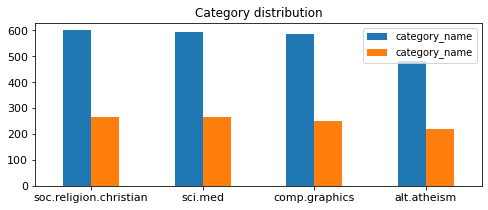

In [15]:
# to create the category distribution chart using the X category and X_sample category
a = X.category_name.value_counts()
b = X_sample.category_name.value_counts()

df1 = a.to_dict()  
df2 = b.to_dict() 

df1Columns = np.array(list(df1.keys())) 
df1Values = np.array(list(df1.values())) 

df2Values = np.array(list(df2.values()))

data = [list(df1.values()), list(df2.values())]
df = pd.DataFrame(data)
df.columns = list(df1.keys())
df = df.transpose()
df.columns = ["category_name", "category_name"]

df.plot(kind = 'bar',title = 'Category distribution', rot = 0, fontsize = 11, figsize = (8,3))

### **>>> Exercise 4**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [17]:
analyze = count_vect.build_analyzer()

analyze(X.iloc[0]['text'])  

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 5 ** 


In [18]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]

In [19]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]

In [20]:
plot_z = X_counts[0:50, 0:50].toarray()

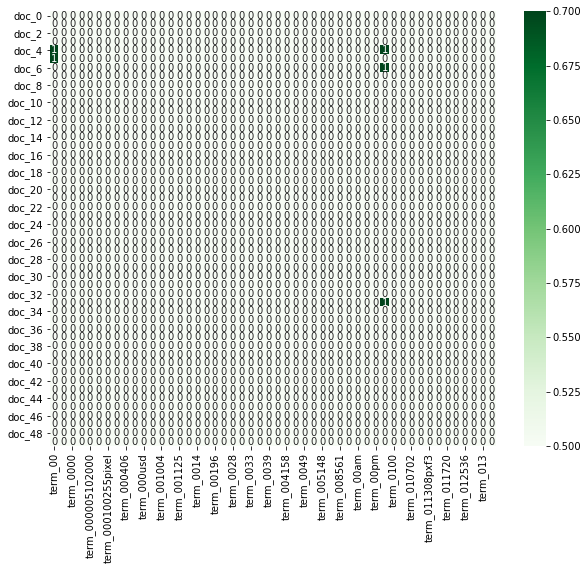

In [21]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_todraw,
                 cmap="Greens",
                 vmin=0.5, vmax=0.7, annot=True)   # color bar range between 0.5 and 0.7

### >>> Exercise 6 


In [22]:
from sklearn.decomposition import PCA

In [23]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

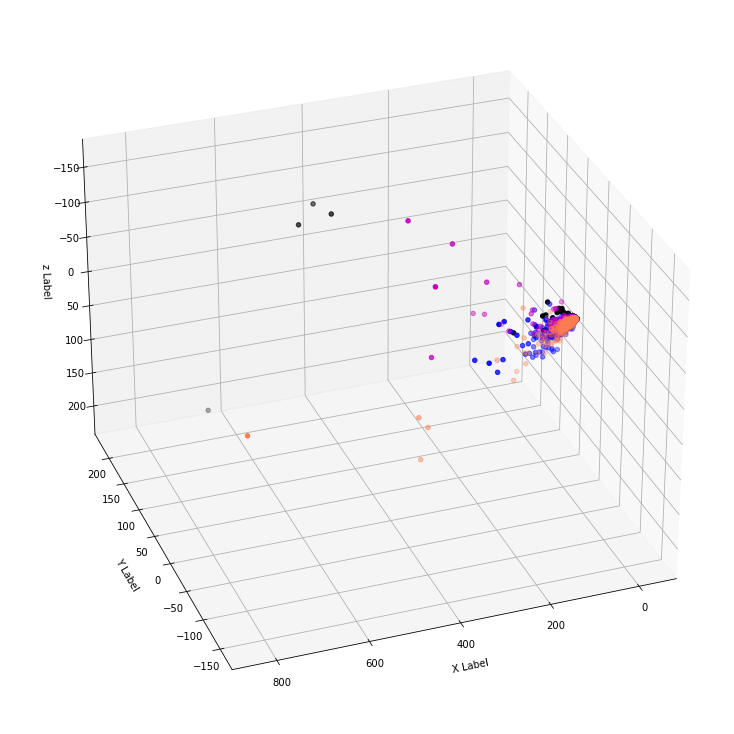

In [24]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))

ax = Axes3D(fig, elev=-150, azim=110)      # Axes3D

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nz Label')

plt.show()

### >>> Exercise 6 (Take home)


In [25]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [26]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

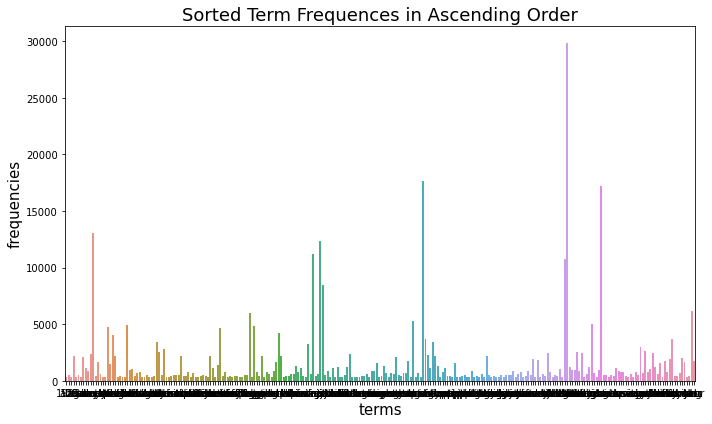

In [27]:
# Reduced terms for computing the frequencies and # Sorted by terms in Ascending order:

plt.figure(figsize=(10,6))

tf_dict = dict(zip(count_vect.get_feature_names_out(), term_frequencies))

tf_dict = dict((i, v) for i, v in tf_dict.items() if v>300)

f_terms = pd.DataFrame(tf_dict.items(), columns = ['terms', 'frequencies'])

sns.barplot(x='terms', 
              y='frequencies', 
              data=f_terms,
              order=f_terms.sort_values('terms').terms)
    
    # set labels
plt.xlabel('terms', size = 15)
plt.ylabel('frequencies', size = 15)
plt.title('Sorted Term Frequences in Ascending Order', size = 18)
plt.tight_layout()
plt.savefig('Sorted by terms', dpi = 100)

## << Exercise 7 (take home)

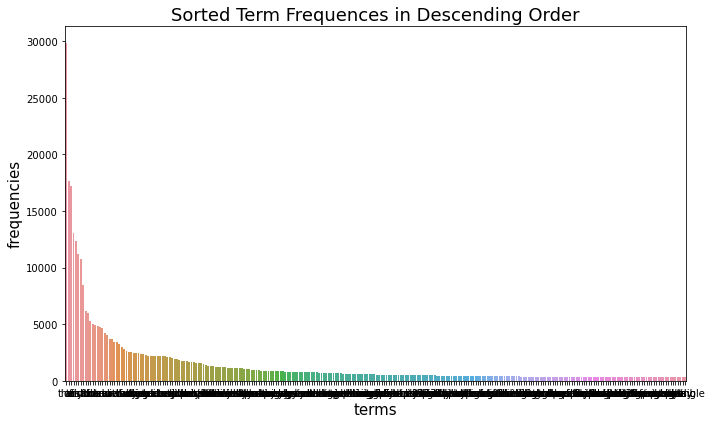

In [28]:
# make barplot and sort the bars based on terms frequencies (X-axis):

plt.figure(figsize=(10,6))

f_terms = pd.DataFrame(tf_dict.items(), columns = ['terms', 'frequencies'])

sns.barplot(x='terms', 
              y='frequencies', 
              data=f_terms,
              order=f_terms.sort_values('frequencies',ascending = False).terms)
    
    # set labels
plt.xlabel('terms', size = 15)
plt.ylabel('frequencies', size = 15)
plt.title('Sorted Term Frequences in Descending Order', size = 18)
plt.tight_layout()
plt.savefig('Sorted Term Frequencies', dpi = 100)

# Part II: (Lab2-home work)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Sentiment data categories
sentiment_labelled = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

In [31]:

amazon_df = pd.read_csv("C://Users//Asse//sentiment labelled sentences//amazon_cells_labelled.txt",
                 delimiter='\t', header=None, names=['sentences', 'score'])

imdb_df = pd.read_csv("C://Users//Asse//sentiment labelled sentences//imdb_labelled.txt",
            delimiter='\t', header=None, names=['sentences', 'score'])

yelp_df = pd.read_csv("C://Users/Asse//sentiment labelled sentences//yelp_labelled.txt", 
            delimiter='\t', header=None, names=['sentences', 'score'])


In [32]:
sentiment_aiy = [amazon_df, imdb_df, yelp_df]

# combining the 3 labelled sentences dataframes from amazon, imdb and yelp

sentiment_df = pd.concat(sentiment_aiy, ignore_index=True)  

In [33]:
sentiment_df

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [34]:
sentiment_df.columns

Index(['sentences', 'score'], dtype='object')

In [35]:
sentiment_df.isnull()

,sentences,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2743,False,False
2744,False,False
2745,False,False
2746,False,False


In [36]:
sentiment_df.isnull().apply(lambda x: dmh.check_missing_values(sentiment_df))

,sentences,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [37]:
sentiment_df.groupby('score').count()

,sentences
score,
0,1362
1,1386


In [38]:
sentiment_df.duplicated

<bound method DataFrame.duplicated of                                               sentences  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2743  I think food should have flavor and texture an...      0
2744                           Appetite instantly gone.      0
2745  Overall I was not impressed and would not go b...      0
2746  The whole experience was underwhelming, and I ...      0
2747  Then, as if I hadn't wasted enough of my life ...      0

[2748 rows x 2 columns]>

In [39]:
sum(sentiment_df.duplicated('sentences'))

17

In [40]:
sentiment_df.drop_duplicates(keep=False, inplace=True) # removing duplication from the dataframe

In [41]:
sentiment_df[:5]

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [42]:
for t in sentiment_df['sentences'][:5]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.


In [43]:
sentiment_df[:-10]

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2733,The problem I have is that they charge $11.99 ...,0
2734,Shrimp- When I unwrapped it (I live only 1/2 a...,0
2735,"It lacked flavor, seemed undercooked, and dry.",0
2736,It really is impressive that the place hasn't ...,0


In [44]:
sentiment_df[0:5][["sentences", "score"]]

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [45]:

sentiment_df.drop_duplicates(keep=False, inplace=True)  # to remove duplication


In [46]:
sum(sentiment_df.duplicated())

0

In [47]:
sentiment_df.loc[::10, 'sentences'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
21    I bought this to use with my Kindle Fire and a...
31    This product is ideal for people like me whose...
41                 I was not impressed by this product.
51    good protection and does not make phone too bu...
61    I really recommend this faceplates since it lo...
71    Even in my BMW 3 series which is fairly quiet,...
81                                  Not a good bargain.
91                                    Made very sturdy.
Name: sentences, dtype: object

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
sentiment_df_sample = sentiment_df.sample(n=500) # random sampling from the data frame

In [50]:
sentiment_df_sample

,sentences,score
791,I own 2 of these cases and would order another.,1
2612,Always a pleasure dealing with him.,1
1423,"A mature, subtle script that suggests and occa...",1
2438,It was absolutely amazing.,1
2513,Tasted like dirt.,0
...,...,...
378,"Clear Skype Calls, Long Battery Life, Long Range.",1
2534,We will not be coming back.,0
1230,The use of slow-motion needlessly repeats itse...,0
1526,"Seriously, it's not worth wasting your, or you...",0


In [51]:
sentiment_df_sample[0:5]

,sentences,score
791,I own 2 of these cases and would order another.,1
2612,Always a pleasure dealing with him.,1
1423,"A mature, subtle script that suggests and occa...",1
2438,It was absolutely amazing.,1
2513,Tasted like dirt.,0


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

1    1366
0    1348
Name: score, dtype: int64


<AxesSubplot:title={'center':'sentiment_types'}>

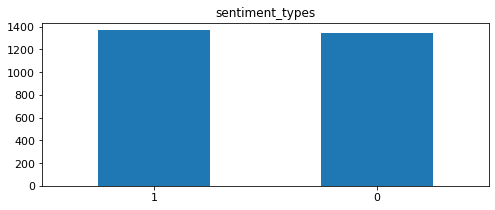

In [53]:
print(sentiment_df.score.value_counts())

# barchart for sentiment_df datasets

sentiment_df.score.value_counts().plot(kind = 'bar',
                                    title = 'sentiment_types',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

1    253
0    247
Name: score, dtype: int64


<AxesSubplot:title={'center':'sentiment class'}>

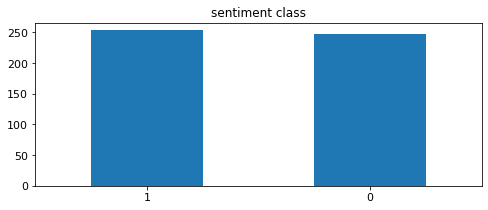

In [54]:
print(sentiment_df_sample.score.value_counts())

# barchart for sentiment_df datasets

sentiment_df_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'sentiment class',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot:title={'center':'sentiment class'}>

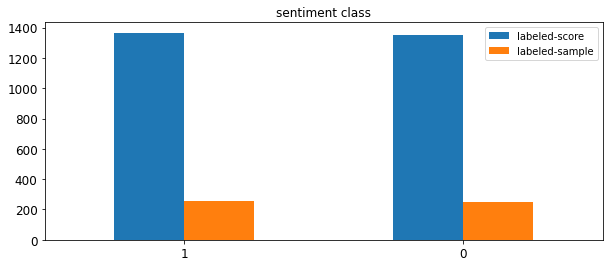

In [55]:
# visualizing the labeled sentiment class from the origional and sampled dataframe
a = sentiment_df.score.value_counts()
b = sentiment_df_sample.score.value_counts()

df1 = a.to_dict() 
df2 = b.to_dict() 

df1Columns = np.array(list(df1.keys())) 
df1Values = np.array(list(df1.values())) 

df2Values = np.array(list(df2.values()))

data = [list(df1.values()), list(df2.values())]
df = pd.DataFrame(data)
df.columns = list(df1.keys())
df = df.transpose()
df.columns = ["labeled-score", "labeled-sample"]
#print(df)
df.plot(kind = 'bar',title = 'sentiment class', rot = 0, fontsize = 12, figsize = (10,4))

1    1366
0    1348
Name: score, dtype: int64

1    0.503316
0    0.496684
Name: score, dtype: float64


C:\Users\Asse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


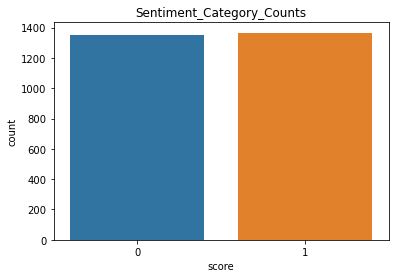

In [56]:
print(sentiment_df['score'].value_counts())

print()

# Print the proportions of each category and Visualization in order to check the data is balanced or not:

print(sentiment_df['score'].value_counts(normalize=True))

sns.countplot(sentiment_df['score'])
plt.title("Sentiment_Category_Counts")
plt.show()

In [57]:
import nltk

In [58]:
sentiment_df['unigrams'] = sentiment_df['sentences'].apply(lambda sentiment_df: dmh.tokenize_text(sentiment_df))

In [59]:
sentiment_df[0:10]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
5    [I, have, to, jiggle, the, plug, to, get, it, ...
6    [If, you, have, several, dozen, or, several, h...
7    [If, you, are, Razr, owner, ..., you, must, ha...
8      [Needless, to, say, ,, I, wasted, my, money, .]
9         [What, a, waste, of, money, and, time, !, .]
Name: unigrams, dtype: object

In [60]:
sentiment_df[0:5]

,sentences,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [61]:
list(sentiment_df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [62]:
# TfidfVectorizer & count vectorizer implementation:

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
sentiment_df_counts = count_vect.fit_transform(sentiment_df.sentences)

In [63]:
vectorizer = TfidfVectorizer()
Tf = vectorizer.fit_transform(sentiment_df['sentences'])

In [64]:
Tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
analyze = count_vect.build_analyzer()

analyze(sentiment_df.iloc[0]['sentences']) 


['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [66]:
# to check the shape of the above term document matrix:
sentiment_df_counts.shape

(2714, 5153)

In [67]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [68]:
sentiment_df_counts[0:5]

<5x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [69]:
sentiment_df_counts[0:5, 0:50].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [70]:
plot_sentiment_df_counts = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]#to plot the first 50 features only

In [71]:
plot_sentiment_df_counts

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020']

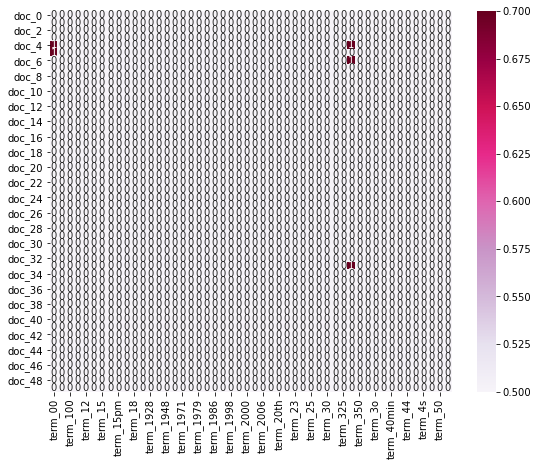

In [72]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_sentiment_df_counts, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0.5, vmax=0.7, annot=True)

In [73]:
# libraries for Naive Bayes Classifier Implementation:

from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

score
0    13.717359
1    12.527818
Name: word_count, dtype: float64


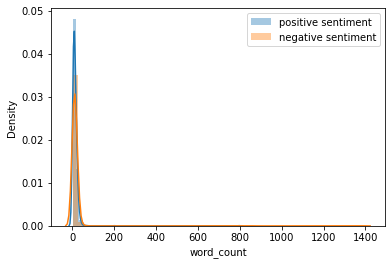

In [74]:

# Visualize the distribution of word counts in each sentiment category:
 
sentiment_df['word_count'] = sentiment_df['sentences'].str.split().str.len()

print(sentiment_df.groupby('score')['word_count'].mean())

sns.distplot(sentiment_df[sentiment_df['score']== 1]['word_count'], label='positive sentiment')
sns.distplot(sentiment_df[sentiment_df['score']== 0]['word_count'], label='negative sentiment'),
plt.legend()
plt.show()

In [75]:
 # Select the features and the target to Build the model:

X = sentiment_df['sentences']
y = sentiment_df['score']

# split the dataset into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34) 

In [76]:
# Create the tf-idf vectorizer

vectorizer = TfidfVectorizer(strip_accents='ascii')

tfidf_train = vectorizer.fit_transform(X_train)

tfidf_test = vectorizer.transform(X_test)


nb = MultinomialNB()     # Initializing the classifier

nb.fit(tfidf_train, y_train)

print("Accuracy:",nb.score(tfidf_test, y_test))  # Print the accuracy score of the classifier
                                                # the model gives an approximately 81% accuracy
                                        #The accuracy of this classifier is not enought to say the model's performance great. 
                                          # its better to do more calculation to  make sure the models performance.

Accuracy: 0.8103130755064457


Confusion Matrix

[[222  46]
 [ 57 218]]


Classification Report

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       268
           1       0.83      0.79      0.81       275

    accuracy                           0.81       543
   macro avg       0.81      0.81      0.81       543
weighted avg       0.81      0.81      0.81       543


ROC AUC Score: 0.8105427408412483


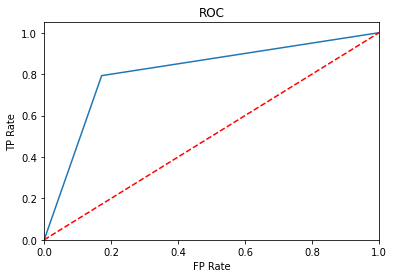

In [77]:
y_pred = nb.predict(tfidf_test)


print("Confusion Matrix\n")                           # checking the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))


cr = classification_report(y_test, y_pred)           # Printing the Classification Report
print("\n\nClassification Report\n")
print(cr)


auc_score = roc_auc_score(y_test, y_pred)               # Printing  Auc score
print("\nROC AUC Score:",auc_score)

y_pred_proba = nb.predict(tfidf_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)# obtaning False Positive rate,True Positive rate and the threshold values

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])                         # Visualize the ROC curve.
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

In [78]:
y_test.value_counts()    # to check the class distribution of the testing set

1    275
0    268
Name: score, dtype: int64

In [79]:
predictions = nb.predict(tfidf_test)
predictions

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [80]:
print('True:', y_test.values[0:20])       # get the first 20 true and predicted responses:
print('False:', y_pred[0:20])

True: [0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0]
False: [1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0]


In [81]:
nb.predict(tfidf_test)[0:10]


array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

Text(0, 0.5, 'Frequency')

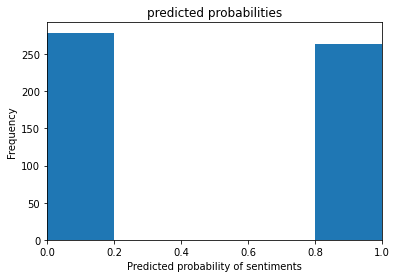

In [82]:
nb.predict_proba(tfidf_test)[0:10]      # print the first 10 predicted probabilities of class membership


plt.hist(y_pred_proba, bins=5)
                                         # histogram of predicted probabilities
plt.xlim(0,1)
plt.title('predicted probabilities')
plt.xlabel('Predicted probability of sentiments')
plt.ylabel('Frequency')